# Clusterization parsed news

- https://sanjayasubedi.com.np/nlp/nlp-with-python-document-clustering/
- https://analyticsindiamag.com/step-by-step-guide-to-implement-multi-class-classification-with-bert-tensorflow/
- https://neurohive.io/ru/tutorial/bert-klassifikacya-teksta/ - BERT для мультиклассовой классификации текста
- https://proglib.io/p/unsupervised-ml-with-python/ - Обучение без учителя

In [28]:
# Imports
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pymysql.cursors

## Get data

In [3]:
# Autorizations data

host_ifm = '*****'
db_ifm = 'information_field'
user_ifm = '*****'
passwd_ifm = '*****'

In [13]:
def get_connection():
    """Get connection in db"""
    
    connection = pymysql.connect(host=host_ifm,
                                 user=user_ifm,
                                 password=passwd_ifm,                             
                                 db=db_ifm,
                                 charset='utf8mb4',
                                 cursorclass=pymysql.cursors.DictCursor)
    return connection


connection = get_connection()
news = pd.read_sql_query("SELECT * FROM news", connection)
connection.close()


In [18]:
news.to_excel('sample_data.xlsx', index=False)

In [50]:
df = pd.read_excel('sample_data.xlsx')

In [51]:
df.head()

,idnews,entrydate,headers,texts,links
0,1,2020-03-30,"МОСКВА, 30 мар — РИА Новости. Президент России...","МОСКВА, 30 мар — РИА Новости. Президент России...",https://ria.ru/20200330/1569358952.html
1,2,2020-03-30,"МОСКВА, 30 мар — РИА Новости. Кабинет министро...","МОСКВА, 30 мар — РИА Новости. Кабинет министро...",https://ria.ru/20200330/1569355267.html
2,3,2020-03-30,"МОСКВА, 30 мар — РИА Новости. В одной из столи...","МОСКВА, 30 мар — РИА Новости. В одной из столи...",https://ria.ru/20200330/1569348601.html
3,4,2020-03-30,"МОСКВА, 30 мар — РИА Новости. Ограничительные ...","МОСКВА, 30 мар — РИА Новости. Ограничительные ...",https://ria.ru/20200330/1569351454.html
4,5,2020-03-30,"МОСКВА, 30 мар — РИА Новости. Цена поставляемо...","МОСКВА, 30 мар — РИА Новости. Цена поставляемо...",https://ria.ru/20200330/1569357365.html


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 5 columns):
idnews       2020 non-null int64
entrydate    2020 non-null datetime64[ns]
headers      2020 non-null object
texts        2020 non-null object
links        2020 non-null object
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 79.0+ KB


## Introduction

Clustering is a process of grouping similar items together. Each group, also called as a cluster, contains items that are similar to each other. Clustering algorithms are unsupervised learning algorithms i.e. we do not need to have labelled datasets. There are many clustering algorithms for clustering including KMeans, DBSCAN, Spectral clustering, hierarchical clustering etc and they have their own advantages and disadvantages. The choice of the algorithm mainly depends on whether or not you already know how many clusters to create. Some algorithms such as KMeans need you to specify number of clusters to create whereas DBSCAN does not need you to specify. Another consideration is whether you need the trained model to able to predict cluster for unseen dataset. KMeans can be used to predict the clusters for new dataset whereas DBSCAN cannot be used for new dataset.

## Feature extraction

For each article in our dataset, we’ll compute TF-IDF values.

In [29]:
vec = TfidfVectorizer()
vec.fit(df.texts.values)
features = vec.transform(df.texts.values)

Now we have our feature matrix, we can feed to the model for training.

## Model training

Let’s create an instance of KMeans. I’ll choose 5 as the number of clusters since the dataset contains articles that belong to one of 5 categories. Obviously, if you do not have labels then you won’t exactly know how many clusters to create so you have to find the best one that fits your needs via running multiple experiements and using domain knowledge to guide you.

Creating a model is pretty simple.

In [33]:
random_state = 0
cls = MiniBatchKMeans(n_clusters=5, random_state=random_state)
cls.fit(features)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=0, reassignment_ratio=0.01,
                tol=0.0, verbose=0)

That is all it takes to create and train a clustering model. Now to predict the clusters, we can call predict function of the model. Note that not all clustering algorithms can predit on new datasets. In that case, you can get the cluster labels of the data that you used when calling the fit function using labels_ attribute of the model.

## Visualization

To visualize, we’ll plot the features in a 2D space. As we know the dimension of features that we obtained from TfIdfVectorizer is quite large ( > 10,000), we need to reduce the dimension before we can plot. For this, we’ll ues PCA to transform our high dimensional features into 2 dimensions.

In [35]:
labels = cls.labels_

In [41]:
df['labels'] = labels

In [42]:
df.head()

,idnews,entrydate,headers,texts,links,labels
0,1,2020-03-30,"МОСКВА, 30 мар — РИА Новости. Президент России...","МОСКВА, 30 мар — РИА Новости. Президент России...",https://ria.ru/20200330/1569358952.html,0
1,2,2020-03-30,"МОСКВА, 30 мар — РИА Новости. Кабинет министро...","МОСКВА, 30 мар — РИА Новости. Кабинет министро...",https://ria.ru/20200330/1569355267.html,1
2,3,2020-03-30,"МОСКВА, 30 мар — РИА Новости. В одной из столи...","МОСКВА, 30 мар — РИА Новости. В одной из столи...",https://ria.ru/20200330/1569348601.html,1
3,4,2020-03-30,"МОСКВА, 30 мар — РИА Новости. Ограничительные ...","МОСКВА, 30 мар — РИА Новости. Ограничительные ...",https://ria.ru/20200330/1569351454.html,3
4,5,2020-03-30,"МОСКВА, 30 мар — РИА Новости. Цена поставляемо...","МОСКВА, 30 мар — РИА Новости. Цена поставляемо...",https://ria.ru/20200330/1569357365.html,2


In [45]:
# reduce the features to 2D
pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(features.toarray())

In [46]:
# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

Now that we have reduced our features and cluster centers into 2D, we can plot those points using a scatter plot. The first dimension will be used as X values and second dimension will be used as Y values in a XY plot. We also assign colors to each items using the predicted cluster labels so that items in a same cluster will be represented with same color. This is done by passing the labels to c parameter in scatter function. Again, if the clustering algorithm does not support predict function or if you want to visualize in the training data itself, you can also use c=cls.labels_ instead.

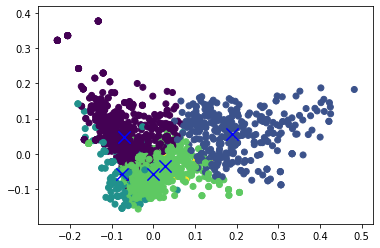

In [48]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b');

## Evaluation with unlabelled dataset

If you don’t have labels for your dataset, then you can still evaluate your clustering model with some metrics. One of them is Silhouette Coefficient. From the sklearn’s documentation:

The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a,b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of.

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

In [49]:
from sklearn.metrics import silhouette_score
silhouette_score(features, labels=cls.predict(features))

0.006926792091742107

In [68]:
lables_kmeans = pd.DataFrame(labels)
lables_kmeans.columns = ['labels']

In [71]:
lables_kmeans.to_excel('lables_kmeans_news.xlsx', index=True)